In [1]:
from adnmtf import NMF, NTF
import pandas as pd
import numpy as np
from IPython.display import clear_output
import time
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.image as image
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import distinctipy
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import sys
import networkx as nx

from sklearn.preprocessing import normalize
from sklearn import metrics

from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import MVMDS
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import umap
from scipy.spatial import distance_matrix
import hoggorm as ho
import adilsm.adilsm as ilsm
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler

from gfa import gfa_experiments

adilsm version=0.0.13


Data prep

In [2]:
###############################################################################
# Load Data
# ---------
# Data comes from UCI Digits Data. Contains 6 views and classifications of
# numbers 0-9

Xs, list_digits = load_UCImultifeature()

sample_rate = 1

if sample_rate < 1:
    num_rows = list_digits.shape[0]
    num_rows_to_select = int(num_rows * sample_rate)
    selected_rows = np.random.choice(num_rows, num_rows_to_select, replace=False)

    for i in range(len(Xs)):
        Xs[i] = Xs[i][selected_rows]

    list_digits = list_digits[selected_rows]

list_cell_codes, list_cell_types = pd.factorize(list_digits)

# Check data
print(f'There are {len(Xs)} views.')
print(f'There are {Xs[0].shape[0]} observations')
print(f'The feature sizes are: {[X.shape[1] for X in Xs]}')


There are 6 views.
There are 2000 observations
The feature sizes are: [76, 216, 64, 240, 47, 6]


In [3]:
Xs_norm = Xs.copy()
scaler = StandardScaler()
for i in range(len(Xs)):
    Xs_norm[i] = Xs[i] - np.mean(Xs[i], axis=0)
    Xs_norm[i] = scaler.fit_transform(Xs_norm[i])

In [4]:
gfa_cov = np.zeros(17)
for k in range(2,17):
    model_gfa = gfa_experiments(Xs_norm, K=k, Nrep=10, rotate=False, verbose=1)
    gfa_cov[k] = np.trace(model_gfa['covZ'])

for k in range(2,17):
    print(k, gfa_cov[k])


Run 1/10: 51 iterations with final cost -1667706.262056
Run 2/10: 51 iterations with final cost -1667717.480977
Run 3/10: 51 iterations with final cost -1667738.247669
Run 4/10: 51 iterations with final cost -1667766.018791
Run 5/10: 51 iterations with final cost -1667761.424712
Run 6/10: 51 iterations with final cost -1667746.082755
Run 7/10: 51 iterations with final cost -1667772.658538
Run 8/10: 50 iterations with final cost -1667713.089674
Run 9/10: 49 iterations with final cost -1667711.213274
Run 10/10: 51 iterations with final cost -1667729.890125
Run 1/10: 84 iterations with final cost -1593176.097569
Run 2/10: 84 iterations with final cost -1593186.563296
Run 3/10: 84 iterations with final cost -1593201.369973
Run 4/10: 84 iterations with final cost -1593163.204557
Run 5/10: 84 iterations with final cost -1593204.955126
Run 6/10: 83 iterations with final cost -1593180.032326
Run 7/10: 85 iterations with final cost -1593193.835499
Run 8/10: 84 iterations with final cost -159324

Figures

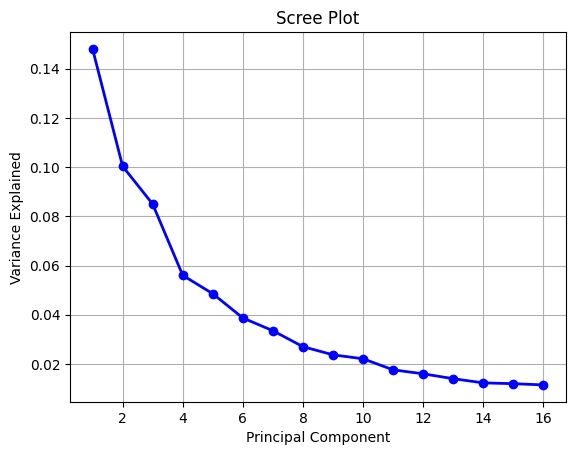

In [5]:
pca = PCA(n_components=16)

# Concatenate views then PCA for comparison
Xs_concat = Xs_norm[0]
for X in Xs_norm[1:]:
    Xs_concat = np.hstack((Xs_concat, X))
Xs_pca_reduced = pca.fit_transform(Xs_concat)


# Plot the scree plot
plt.plot (np.arange (1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xlabel ('Principal Component')
plt.ylabel ('Variance Explained')
plt.title ('Scree Plot')
plt.grid ()
plt.show ()

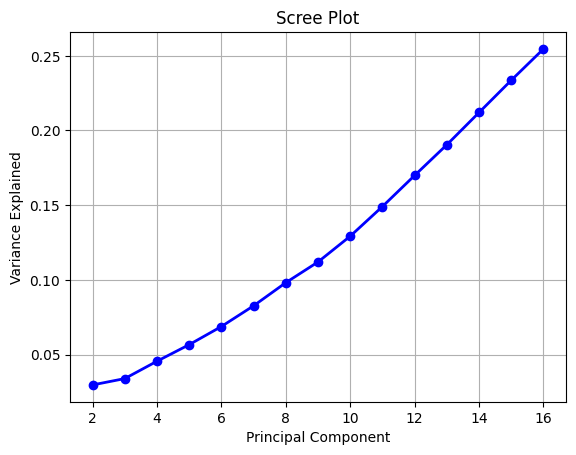

In [6]:
# Plot the scree plot
plt.plot (np.arange(2,17), gfa_cov[2:17], 'o-', linewidth=2, color='blue')
plt.xlabel ('Principal Component')
plt.ylabel ('Variance Explained')
plt.title ('Scree Plot')
plt.grid ()
plt.show ()